<a href="https://colab.research.google.com/github/Existanze54/sirius-machine-learning-2024/blob/main/Homeworks/HW2_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-success">
    
## Основные алгоритмы машинного обучения

## Домашнее задание 2

###  Метод k ближайших соседей kNN

### Задание 1. KNN своими руками.

В данном задании мы попробуем реализовать алгоритм KNN своими руками.

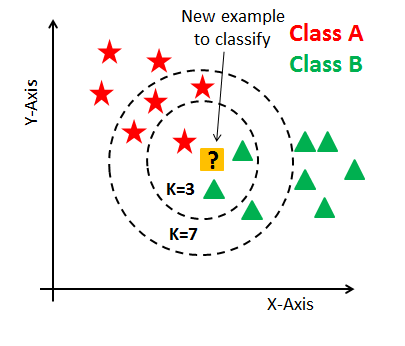

In [8]:
import numpy as np

class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        pass

    def predict(self, X):
        y_pred = []
        for x in X: 
            #Вычисляем соседей для каждого элемента X
            distances = [self.count_distance(x, x_train) for x_train in self.X_train]
            
            #Отбираем k соседей по расстоянию
            #Сортируем растония от мменьшего к большему
            k_near_x = np.argsort(distances)[:self.k]
            k_near_y = [self.y_train[i] for i in k_near_x]
            
            if len(set(k_near_y)) == 1:
                #Наибольшее и есть первый элемент
                predicted_y = k_near_y[0]
            else:
                #Отбираем наибольшее значение среди оригинальных значений
                predicted_y = max(set(k_near_y))
            
            y_pred.append(predicted_y)
        return np.array(y_pred)
        pass

    def count_distance(self, x, y):
        return np.sqrt(np.sum((x - y)**2))
        pass

In [9]:
# Простой тест для проверки работоспособности
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [4, 4]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

In [10]:
# тест должен проходить
test_knn(KNN)

### Задание 2:  Визуализация решающих поверхностей.

Нужно будет изобразить решающую поверхность для собственного классификатора kNN, чтобы визуально оценить его работоспособность.

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 2.1** Есть ли в наборе данных пропущенные значения? А категориальные переменные? Если да, то удалите их

In [18]:
null_list = X.isnull().sum()
print(f"Параметры с пропусками по X: {null_list[null_list > 0]}") 
X = X.dropna() 

print(f"y имеет пропуски: {sum(np.isnan(y))}") 
y = y[~np.isnan(y)]

Параметры с пропусками по X: Series([], dtype: int64)
y имеет пропуски: 0


**Задача 2.2** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [23]:
from sklearn.model_selection import train_test_split

np.random.seed(300)
random_s = np.random.RandomState(300)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=random_s)

**Задача 2.3** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25. Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X = pd.DataFrame({
    'alcohol': X['alcohol'],
    'magnesium': X['magnesium']
})
y = data['target']
X = X.dropna() 
y = y[~np.isnan(y)]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=random_s)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print("NN\tTrain\tTest")
list_k = [1, 3, 5, 10, 15, 25]
for k in list_k:
    model = KNeighborsClassifier(n_neighbors = k, metric='euclidean')
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_train)
    persent_train = accuracy_score(y_train, y_pred)
    
    y_pred = model.predict(X_test)
    persent_test = accuracy_score(y_test, y_pred)
    
    print(f"{k}\t{round(persent_train, 2)}\t{round( persent_test, 2)}")

NN	Train	Test
1	1.0	0.63
3	0.85	0.67
5	0.83	0.69
10	0.77	0.74
15	0.74	0.74
25	0.74	0.72


**Задача 2.4** Визуализируйте решающую поверхность для своего классификатора с разным числом соседей. Код можно взять с лекции/семинара. Не забудьте, что в данном датасете 3 класса.

In [59]:
from sklearn.metrics import f1_score

def make_qual_chart(X_train, X_test, y_train, y_test, metric=f1_score, limit=50):
    train_quals = np.zeros(limit)
    test_quals = np.zeros(limit)
    param_range = np.arange(1, limit  + 1)

    for ind, value in enumerate(param_range):
        ### CHANGE THE NEXT LINE!
        model = KNeighborsClassifier(n_neighbors = value, metric = 'euclidean')
        # FIT
        model.fit(X_train, y_train)
        # PREDICT
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        # EVALUATE QUALITY
        train_quals[ind] = metric(y_true=y_train, y_pred=y_train_pred, average='macro')
        test_quals[ind] = metric(y_true=y_test, y_pred=y_test_pred, average='macro')


    # TRACING CHART
    plt.figure(figsize=(10, 7))
    plt.plot(param_range, train_quals, label="Train")
    plt.plot(param_range, test_quals, label="Test")

    plt.legend()
    plt.show()
    return param_range, train_quals, test_quals

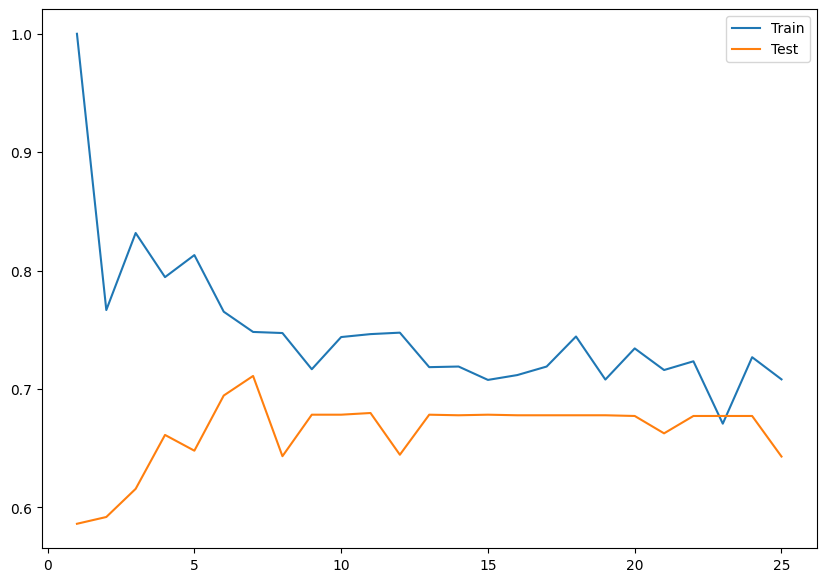

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25]),
 array([1.        , 0.76665666, 0.83172705, 0.79445714, 0.813076  ,
        0.7652588 , 0.74815848, 0.74724016, 0.71666667, 0.74384695,
        0.74632875, 0.74755295, 0.71841879, 0.71894207, 0.70764385,
        0.71173672, 0.71894207, 0.74431514, 0.70794098, 0.73425084,
        0.71599587, 0.72336957, 0.67068713, 0.72682749, 0.70811404]),
 array([0.58613047, 0.59185566, 0.615636  , 0.66117216, 0.6478623 ,
        0.69444444, 0.7109936 , 0.64320354, 0.67826618, 0.67826618,
        0.67969165, 0.64444444, 0.67826618, 0.67777778, 0.67826618,
        0.67777778, 0.67777778, 0.67777778, 0.67777778, 0.67718388,
        0.66250905, 0.67718388, 0.67718388, 0.67718388, 0.64291936]))

In [60]:
make_qual_chart(X_train, X_test, y_train, y_test, limit=25)

In [ ]:
Наиболее оптимальный интервал k = [15, 20]

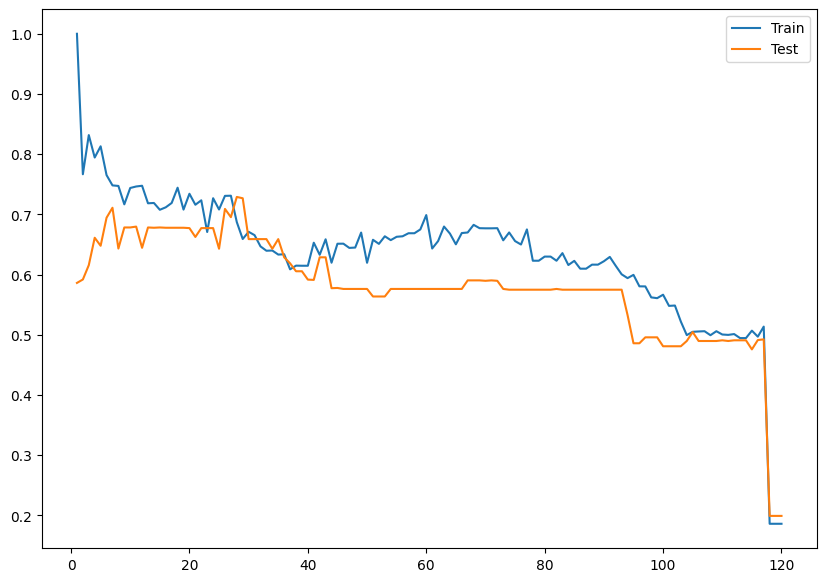

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120]),
 array([1.        , 0.76665666, 0.83172705, 0.79445714, 0.813076  ,
        0.7652588 , 0.74815848, 0.74724016, 0.71666667, 0.74384695,
        0.74632875, 0.74755295, 0.71841879, 0.71894207, 0.70764385,
        0.71173672, 0.71894207, 0.74431514, 0.70794098, 0.73425084,
        0.71599587, 0.72336957, 0.67068713, 0.

In [63]:
make_qual_chart(X_train, X_test, y_train, y_test, limit=120)

Здесь видно, что хороший интервал есть для k = [40, 110], но предыдущий интервал все равно кажеться лучше

In [58]:
from sklearn.metrics import classification_report

list_k = [1, 3, 5, 10, 15, 25]
for k in list_k:
    model = KNeighborsClassifier(n_neighbors = k, metric='euclidean')
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    print(f"k={k}##########################################")
    print(classification_report(y_true=y_test, y_pred=y_pred))

k=1##########################################
              precision    recall  f1-score   support

           0       0.64      0.50      0.56        18
           1       0.83      0.87      0.85        23
           2       0.31      0.38      0.34        13

    accuracy                           0.63        54
   macro avg       0.60      0.58      0.59        54
weighted avg       0.64      0.63      0.63        54

k=3##########################################
              precision    recall  f1-score   support

           0       0.75      0.67      0.71        18
           1       0.80      0.87      0.83        23
           2       0.31      0.31      0.31        13

    accuracy                           0.67        54
   macro avg       0.62      0.61      0.62        54
weighted avg       0.66      0.67      0.66        54

k=5##########################################
              precision    recall  f1-score   support

           0       0.81      0.72      0.76  

судя по f1-score k = [10, 15] выявление классов лучше, как и по precision, recall

## DecisionTreeClassifier

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        20
           1       0.80      1.00      0.89        16
           2       1.00      0.89      0.94        18

    accuracy                           0.93        54
   macro avg       0.93      0.93      0.93        54
weighted avg       0.94      0.93      0.93        54



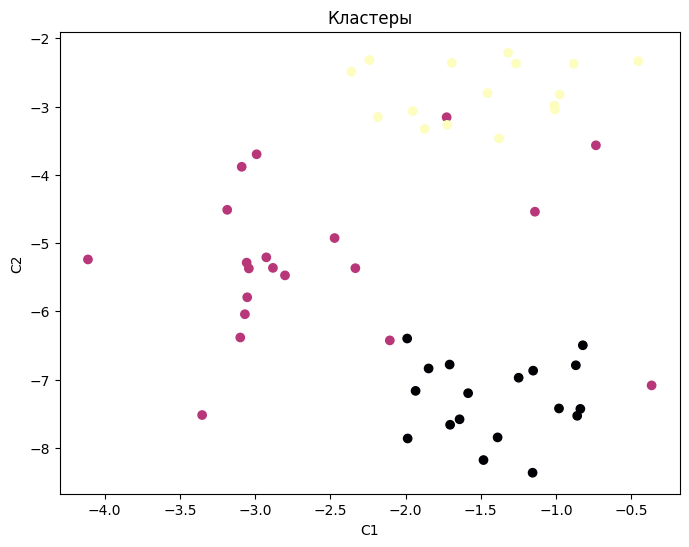

K=3 fitted in 0.124 seconds.
K=4 fitted in 0.147 seconds.
K=5 fitted in 0.156 seconds.
K=6 fitted in 0.150 seconds.
K=7 fitted in 0.173 seconds.
K=8 fitted in 0.119 seconds.
K=9 fitted in 0.156 seconds.
K=10 fitted in 0.171 seconds.
K=11 fitted in 0.148 seconds.
K=12 fitted in 0.149 seconds.
K=13 fitted in 0.168 seconds.
K=14 fitted in 0.160 seconds.


Text(0.5, 1.0, 'Gaussian Mixture Model (scikit-learn)')

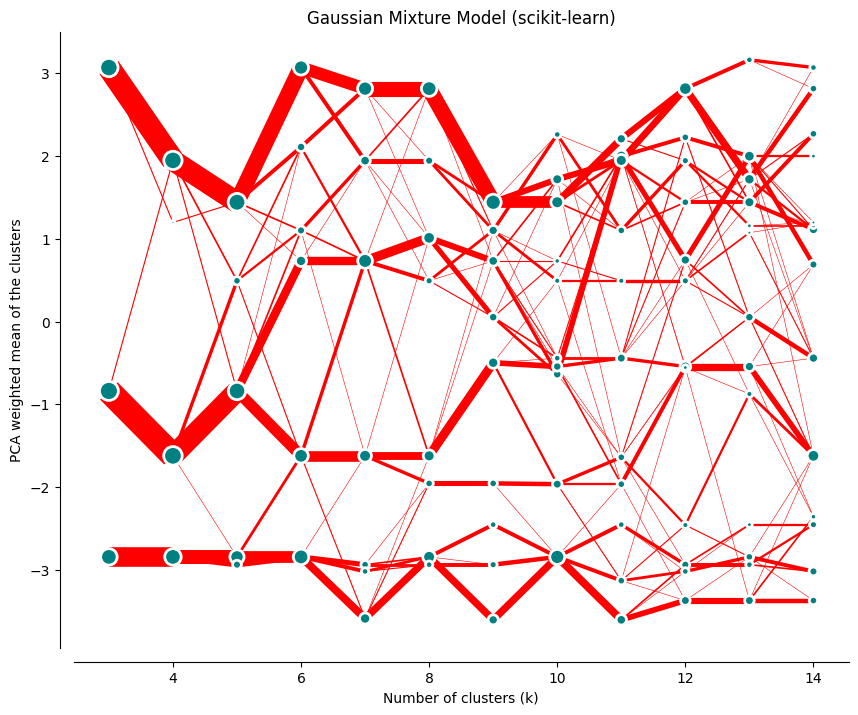

In [123]:
import numpy as np 
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from clustergram import Clustergram
import seaborn as sns
from sklearn.preprocessing import scale

X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
random_s = np.random.RandomState(300)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=random_s)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

scaler = StandardScaler()
scaler.fit(X_test)
X_test = scaler.transform(X_test)
#---------------------------------------------------------------------------------
classifier = DecisionTreeClassifier(criterion = 'entropy', splitter = 'best', max_depth = 6)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_pred))
#---------------------------------------------------------------------------------
#Ординация по PCA/TSNE
#ord = PCA(n_components=2)
ord = TSNE(n_components=2)
ord_axis = ord.fit_transform(X_test)

#Метрика для расскраски будет y_pred
plt.figure(figsize=(8, 6))
plt.scatter(ord_axis[:, 0], ord_axis[:, 1], c=y_pred, cmap="magma")
plt.title("Кластеры")
plt.xlabel("C1")
plt.ylabel("C2")
plt.show()

cgram = Clustergram(range(3, 15), n_init=10, method="gmm")
#range(3, 25) - кластеры от 3 до 25
#n_init - количество запусков алгоритма с разными случайными начальными центрами кластеров.
cgram.fit(X_train, y_train)

ax = cgram.plot(
    figsize=(10, 8),
    line_style=dict(color= "#FF0000"),
    cluster_style={"color": "#008080"},
)
ax.yaxis.grid(False)
sns.despine(offset=10)
ax.set_title("Gaussian Mixture Model (scikit-learn)")